In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importaciones
import random, os, shutil
import copy
import imageio
import PIL
from keras.preprocessing import image
import numpy as np
import cv2

In [4]:
#Creación del directorio que almacenará los conjuntos de entrenamiento y validación
os.mkdir('COVID-19_Dataset')

In [5]:
from zipfile import ZipFile

datasets = ['Train', 'Validation']
for dataset in datasets:
  with ZipFile('/content/drive/My Drive/COVID-19_Dataset/{}.zip'.format(dataset), 'r') as zip: 
      zip.extractall('COVID-19_Dataset')  

# **Referenciamos los conjuntos de entrenamiento y validación**

In [6]:
train_dir = os.path.join('COVID-19_Dataset/Train')
validation_dir = os.path.join('COVID-19_Dataset/Validation')

# **Sistema de detección # 1**

# **Definición de la arquitectura**

In [7]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

# **Compilación**

In [9]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer='adam', #SGD
              metrics=['acc'])

# **Definición de los generadores**

In [10]:
#Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(224, 224), # All images are resized from 240x320 to 72x96
        batch_size= 32, 
        color_mode='rgb',
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=1,
        color_mode='rgb',
        class_mode='binary',
        shuffle=False)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


# **Entrenamiento**

In [11]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=7, #70
      epochs= 10,
      validation_data=validation_generator,
      validation_steps=60)

Epoch 1/10
7/7 [==============================] - 6s 892ms/step - loss: 1.0539 - acc: 0.5357 - val_loss: 0.6821 - val_acc: 0.5000
Epoch 2/10
7/7 [==============================] - 7s 986ms/step - loss: 0.5958 - acc: 0.7054 - val_loss: 0.4874 - val_acc: 0.9333
Epoch 3/10
7/7 [==============================] - 7s 998ms/step - loss: 0.4407 - acc: 0.8125 - val_loss: 0.4251 - val_acc: 0.9667
Epoch 4/10
7/7 [==============================] - 7s 977ms/step - loss: 0.3245 - acc: 0.8973 - val_loss: 0.1586 - val_acc: 0.9667
Epoch 5/10
7/7 [==============================] - 7s 981ms/step - loss: 0.2654 - acc: 0.9107 - val_loss: 0.2661 - val_acc: 0.9833
Epoch 6/10
7/7 [==============================] - 7s 976ms/step - loss: 0.2193 - acc: 0.9286 - val_loss: 0.1240 - val_acc: 0.9667
Epoch 7/10
7/7 [==============================] - 7s 981ms/step - loss: 0.1703 - acc: 0.9330 - val_loss: 0.1005 - val_acc: 0.9833
Epoch 8/10
7/7 [==============================] - 7s 990ms/step - loss: 0.1517 - acc: 0.93

# **Curvas de precisión y pérdida**

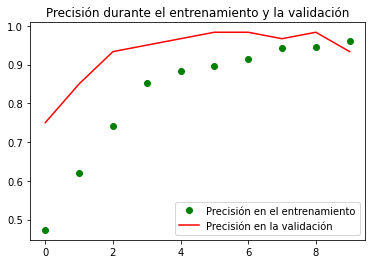

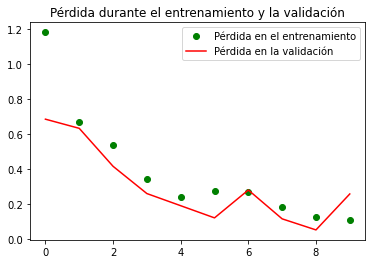

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()

plt.show()

# **Re-entrenamiento del modelo**

In [ ]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=7, #70
      epochs= 9)

Epoch 1/9
7/7 [==============================] - 8s 1s/step - loss: 1.9628 - acc: 0.4777
Epoch 2/9
7/7 [==============================] - 7s 1s/step - loss: 0.7030 - acc: 0.5312
Epoch 3/9
7/7 [==============================] - 7s 1s/step - loss: 0.6695 - acc: 0.5982
Epoch 4/9
7/7 [==============================] - 8s 1s/step - loss: 0.6353 - acc: 0.6161
Epoch 5/9
7/7 [==============================] - 7s 1s/step - loss: 0.4663 - acc: 0.7991
Epoch 6/9
7/7 [==============================] - 7s 1s/step - loss: 0.3113 - acc: 0.8839
Epoch 7/9
7/7 [==============================] - 8s 1s/step - loss: 0.3441 - acc: 0.8571
Epoch 8/9
7/7 [==============================] - 7s 1s/step - loss: 0.3008 - acc: 0.8616
Epoch 9/9
7/7 [==============================] - 7s 1s/step - loss: 0.2768 - acc: 0.9107


In [ ]:
#Guardamos el modelo
model.save('/content/drive/My Drive/COVID-19_Dataset/covid_detection1.h5')

# **Evaluación del desempeño mediante matriz de confusión y F1**

**Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix

test_predictions = model.predict_generator(validation_generator, 60) # model.predict_generator(generador, num_lotes_por_epoca)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
test_predictions = (test_predictions > 0.5)
print(test_predictions)

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]]


In [ ]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix

test_predictions = model.predict_generator(validation_generator, 60) # model.predict_generator(generador, num_lotes_por_epoca)
test_predictions = (test_predictions > 0.5)
cm = confusion_matrix(validation_generator.classes, test_predictions)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[30  0]
 [ 1 29]]


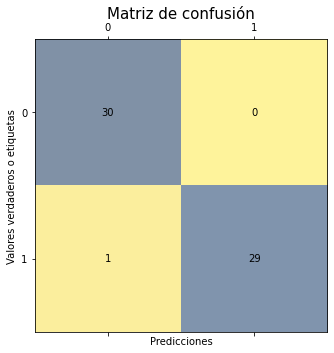

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.cividis_r, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.title("Matriz de confusión", fontsize=15)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
plt.show()

**Calculamos la métrica F1**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.7f' % precision_score(y_true=validation_generator.classes, y_pred=test_predictions))
print('Recall: %.7f' % recall_score(y_true=validation_generator.classes, y_pred=test_predictions))
print('F1: %.7f' % f1_score(y_true=validation_generator.classes, y_pred=test_predictions))

Precision: 1.0000000
Recall: 0.9666667
F1: 0.9830508


# **Sistema de detección # 2 (Basado en transfer learning)**

**Carga de la arquitectura VGG16**

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

conv_base.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

**Congelamos y descongelamos ciertas capas (Fine-tuning)**

In [ ]:
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# **Definición de la arquitectura (incluyendo el módulo de transfer learning)**

In [ ]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 512)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 3, 512)         2048      
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 4609      
Total params: 14,721,345
Trainable params: 7,085,057
Non-trainable params: 7,636,288
_________________________________________________________________


# **Compilación**

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# **Entrenamiento**

In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=7, #70
      epochs= 10,
      validation_data=validation_generator,
      validation_steps=60)

Epoch 1/10
7/7 [==============================] - 6s 794ms/step - loss: 0.2942 - acc: 0.8705 - val_loss: 0.3748 - val_acc: 0.7333
Epoch 2/10
7/7 [==============================] - 6s 896ms/step - loss: 0.0120 - acc: 0.9955 - val_loss: 0.4549 - val_acc: 0.7167
Epoch 3/10
7/7 [==============================] - 6s 860ms/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.3722 - val_acc: 0.8167
Epoch 4/10
7/7 [==============================] - 6s 877ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.4174 - val_acc: 0.8000
Epoch 5/10
7/7 [==============================] - 6s 888ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.2847 - val_acc: 0.8500
Epoch 6/10
7/7 [==============================] - 6s 883ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.2180 - val_acc: 0.9000
Epoch 7/10
7/7 [==============================] - 6s 888ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.1769 - val_acc: 0.9167
Epoch 8/10
7/7 [==============================] - 6s 864ms/step - loss: 8.9964e-04 - acc: 

# **Curvas de precisión y pérdida**

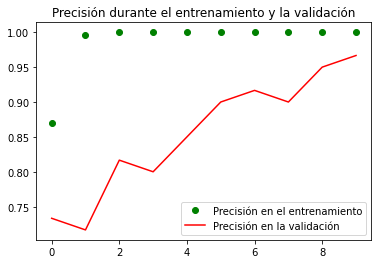

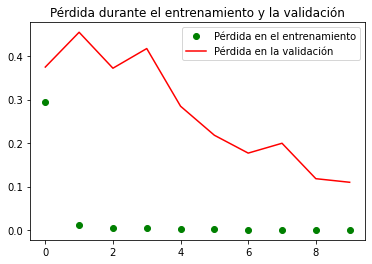

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()

plt.show()

# **Re-entrenamiento**

In [ ]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 512)         2048      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4609      
Total params: 14,721,345
Trainable params: 7,085,057
Non-trainable params: 7,636,288
_________________________________________________________________


In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=7, #70
      epochs= 8)

Epoch 1/8
7/7 [==============================] - 7s 949ms/step - loss: 0.1346 - acc: 0.9241
Epoch 2/8
7/7 [==============================] - 7s 1s/step - loss: 0.0026 - acc: 1.0000
Epoch 3/8
7/7 [==============================] - 7s 1s/step - loss: 0.0019 - acc: 1.0000
Epoch 4/8
7/7 [==============================] - 7s 1s/step - loss: 0.0020 - acc: 1.0000
Epoch 5/8
7/7 [==============================] - 7s 959ms/step - loss: 0.0011 - acc: 1.0000
Epoch 6/8
7/7 [==============================] - 7s 981ms/step - loss: 0.0015 - acc: 1.0000
Epoch 7/8
7/7 [==============================] - 7s 1s/step - loss: 2.3224e-04 - acc: 1.0000
Epoch 8/8
7/7 [==============================] - 7s 988ms/step - loss: 0.0080 - acc: 0.9955


In [ ]:
#Guardamos el modelo
model.save('/content/drive/My Drive/COVID-19_Dataset/covid_detection2.h5')

# **Evaluación del desempeño mediante matriz de confusión y F1**

**Matriz de confusión**

In [ ]:
test_predictions = model.predict_generator(validation_generator, 60)
test_predictions = (test_predictions > 0.5)
cm = confusion_matrix(validation_generator.classes, test_predictions)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[30  0]
 [ 1 29]]


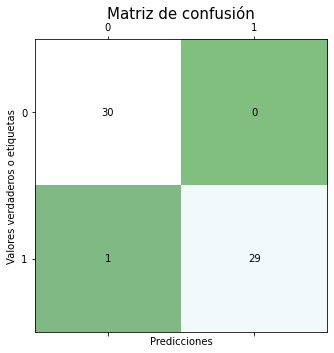

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.ocean, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.title("Matriz de confusión", fontsize=15)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
plt.show()

**Calculamos la métrica F1**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.7f' % precision_score(y_true=validation_generator.classes, y_pred=test_predictions))
print('Recall: %.7f' % recall_score(y_true=validation_generator.classes, y_pred=test_predictions))
print('F1: %.7f' % f1_score(y_true=validation_generator.classes, y_pred=test_predictions))

Precision: 1.0000000
Recall: 0.9666667
F1: 0.9830508


# **Referencias**

La base de datos usada en este Notebook, así como la arquitectura y los hiperparámetros correspondientes a la primera CNN, fueron tomados del siguiente sitio web: https://towardsdatascience.com/detecting-covid-19-using-deep-learning-262956b6f981.